<a href="https://colab.research.google.com/github/anup-marka/neural-networks/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [64]:

# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [65]:
torch.manual_seed(32)

In [66]:
model = Model()

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [68]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
iris = pd.read_csv(url)

In [69]:
iris.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [70]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [71]:
iris['variety'] = iris['variety'].replace('Setosa',0.0)
iris['variety'] = iris['variety'].replace('Versicolor',1.0)
iris['variety'] = iris['variety'].replace('Virginica',2.0)

/tmp/ipython-input-1703237649.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris['variety'] = iris['variety'].replace('Virginica',2.0)


In [72]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [73]:
X = iris.drop('variety',axis=1).values
y = iris['variety'].values

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [76]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [77]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [78]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1699321269989014
Epoch: 10 and loss: 0.9570867419242859
Epoch: 20 and loss: 0.7980871796607971
Epoch: 30 and loss: 0.6327950358390808
Epoch: 40 and loss: 0.43861737847328186
Epoch: 50 and loss: 0.290453165769577
Epoch: 60 and loss: 0.17780695855617523
Epoch: 70 and loss: 0.11584118008613586
Epoch: 80 and loss: 0.0893637090921402
Epoch: 90 and loss: 0.07752915471792221


Text(0.5, 0, 'epochs')

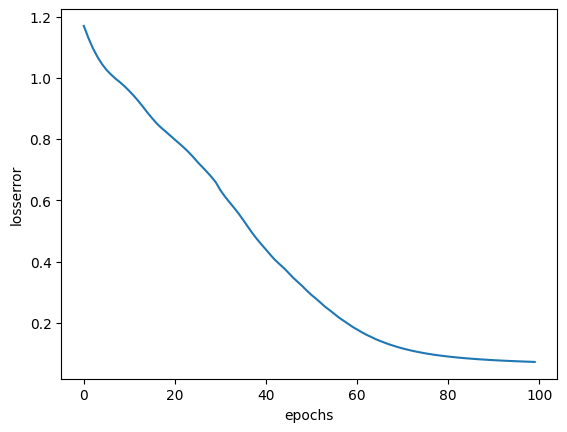

In [79]:
plt.plot(range(epochs), losses)
plt.ylabel('losserror')
plt.xlabel('epochs')

In [80]:
from datetime import date
with torch.no_grad():
  #y_eval = model.forward(X_test)
  #loss = criterion(y_eval, y_test)
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i} {str(y_val.argmax().item())} {y_test[i]} {y_val.argmax().item()==y_test[i]}')

0 1 1 True
1 0 0 True
2 0 0 True
3 1 1 True
4 2 2 True
5 2 2 True
6 0 0 True
7 0 0 True
8 1 1 True
9 0 0 True
10 1 1 True
11 2 2 True
12 1 1 True
13 1 1 True
14 2 2 True
15 2 2 True
16 1 1 True
17 2 2 True
18 1 1 True
19 0 0 True
20 0 0 True
21 2 2 True
22 2 2 True
23 0 0 True
24 0 0 True
25 1 1 True
26 0 0 True
27 2 2 True
28 0 0 True
29 0 0 True


In [81]:
loss

tensor(0.0718, grad_fn=<NllLossBackward0>)